Project Introduction

This project focuses on identifying the "Best Neighborhood in Pittsburgh" based on a comprehensive and data-driven approach. The goal was to define a set of metrics that reflect quality of life and then analyze neighborhoods using these metrics. By combining data related to crime, air quality, and parks, we aimed to develop a balanced and meaningful way to determine which neighborhood stands out as the best.

Approach
The process began with selecting key metrics that represent different facets of a neighborhood's livability:

Crime: Evaluated through arrest data, with fewer arrests indicating better safety.
Parks: Measured by the number of parks or green spaces, reflecting accessibility to recreational areas.
Air Quality: Assessed using Air Quality Index (AQI) data, with lower AQI scores (better air quality) being more desirable.
Each metric was normalized to ensure comparability, scaling 


The first dataset being analyzed is crime, and for this, I imported Pittsburgh police arrest data that contains the neighborhood in which the arrest occurred, and other data labels including age, gender, race, offense, etc.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv("C:\\Users\\ROM184\\Downloads\\e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")
data.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


Here, I am using the groupby function and the number of arrests per neighborhood and saving it to a variable, and then figuring out the neigborhood with the least arrests and finally printing the data associated with it.

In [41]:
arrests_by_neighborhood = data.groupby('INCIDENTNEIGHBORHOOD').size()

least_arrests_neighborhood = arrests_by_neighborhood.idxmin()

# Get the count of arrests in that neighborhood
least_arrests_count = arrests_by_neighborhood.min()

# Print the result
print(f"Neighborhood with least arrests: {least_arrests_neighborhood} ({least_arrests_count} arrests)")

Neighborhood with least arrests: Mt. Oliver Neighborhood (2 arrests)


I have created a bar graph to represent the arrest count by neighborhood less than 30 in order to eliminate any confusion that might occur if the graph is hard to read because of too many data values. I have highlighted the graph for Mt. Oliver in red in order to distinguish it from the rest, and I have also added a label to it showing that it is the neighborhood with the least arrests.

In [35]:
filtered_data = arrests_by_neighborhood[arrests_by_neighborhood < 30]

# Plot the filtered data
ax = filtered_data.plot(kind='bar', color='skyblue')

# Highlight the bar with the least arrests
least_arrest_idx = filtered_data.idxmin()  # Get index of the neighborhood with the least arrests
least_arrests_count = filtered_data.min()  # Get the count of the least arrests
ax.patches[filtered_data.index.get_loc(least_arrest_idx)].set_color('red')

plt.annotate(f'Least Arrests: {least_arrests_count}', 
             xy=(filtered_data.index.get_loc(least_arrest_idx), least_arrests_count),  # Position of the annotation
             xytext=(filtered_data.index.get_loc(least_arrest_idx), least_arrests_count + 0.5),  # Position of the text
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # Arrow styling
             ha='center')

# Annotate the least arrest count on the graph
plt.title('Arrest Count by Neighborhood (Less Than 30)')
plt.xlabel('Neighborhood')
plt.ylabel('Arrest Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

NameError: name 'arrests_by_neighborhood' is not defined

Second data set, which represents the air quality of various neighborhoods in Pittsburgh. This dataset contains index values, neighborhoods, and other columns. The neighborhoods with lower air quality are considered more safe due to the fact that they are less polluted.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("C:\\Users\\ROM184\\Downloads\\4ab1e23f-3262-4bd3-adbf-f72f0119108b.csv")
data.head(20)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,4,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,5,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
5,6,2016-01-01,Lincoln,PM10,11,Good,NaN,NaN
6,7,2016-01-01,South Fayette,SO2,3,Good,NaN,NaN
7,8,2016-01-01,North Braddock,PM10B,12,Good,NaN,NaN
8,9,2016-01-01,Parkway East,CO,4,Good,NaN,NaN
9,10,2016-01-01,Flag Plaza,PM10,7,Good,NaN,NaN


In [10]:
# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty before finding the maximum AQI
if not data_2016.empty:
    # Find the neighborhood with the highest AQI in 2016
    highest_aqi_neighborhood = data_2016.loc[data_2016['index_value'].idxmax()]

    # Print the neighborhood and the corresponding AQI value
    print(f"The neighborhood with the highest AQI in 2016 is {highest_aqi_neighborhood['site']} with an AQI of {highest_aqi_neighborhood['index_value']}.")
else:
    print("No data available for the year 2016.")


The neighborhood with the highest AQI in 2016 is Lincoln with an AQI of 139.


Here, I am creating a pie chart to represent the top 5 neighborhoods with the highest AQI, and it seen that Lincoln has the highest AQI, meaning that it is the most polluted.

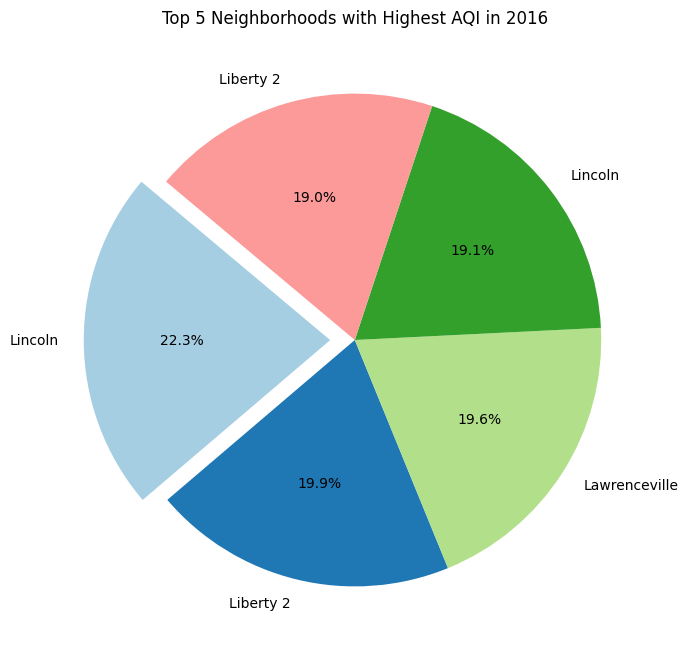

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty
if not data_2016.empty:
    # Find the top 5 neighborhoods with the highest AQI in 2016
    highest_aqi = data_2016.nlargest(5, 'index_value')
    
    # Extract data for the pie chart
    labels = highest_aqi['site']
    sizes = highest_aqi['index_value']
    explode = [0.1 if i == sizes.idxmax() else 0 for i in highest_aqi.index]  # Highlight the highest AQI

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', 
            startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Top 5 Neighborhoods with Highest AQI in 2016')
    plt.show()
else:
    print("No data available for the year 2016.")



Here, I am printing out the top 5 neighborhoods with the lowest AQI, and it is seen that Flag Plaza is the least polluted.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:\\Users\\ROM184\\Downloads\\4ab1e23f-3262-4bd3-adbf-f72f0119108b.csv")

# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty
if not data_2016.empty:
    # Drop duplicate sites
    data_2016_unique = data_2016.drop_duplicates(subset='site')

    # Find the top 5 neighborhoods with the lowest AQI in 2016 (safest AQI indexes)
    lowest_aqi = data_2016_unique.nsmallest(5, 'index_value')

    # Print the details of the top 5 neighborhoods with the lowest AQI
    print("Top 5 neighborhoods with the safest (lowest) AQI in 2016:")
    for index, row in lowest_aqi.iterrows():
        print(f"Neighborhood: {row['site']}, AQI: {row['index_value']}")

Top 5 neighborhoods with the safest (lowest) AQI in 2016:
Neighborhood: Flag Plaza, AQI: 0
Neighborhood: Lawrenceville 2, AQI: 1
Neighborhood: South Fayette, AQI: 3
Neighborhood: Liberty, AQI: 3
Neighborhood: Parkway East, AQI: 4


In [33]:
# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty
if not data_2016.empty:
    # Drop duplicate sites
    data_2016_unique = data_2016.drop_duplicates(subset='site')

    # Find the neighborhood with the lowest AQI in 2016 (safest AQI index)
    lowest_aqi_neighborhood = data_2016_unique.loc[data_2016_unique['index_value'].idxmin()]

    # Print the neighborhood and the corresponding AQI value
    print(f"The safest neighborhood in 2016 is {lowest_aqi_neighborhood['site']} with an AQI of {lowest_aqi_neighborhood['index_value']}.")
else:
    print("No data available for the year 2016.")


The safest neighborhood in 2016 is Flag Plaza with an AQI of 0.


The last dataset, which represents the number of parks in each neighborhood. Generally speaking, a neighborhood with a great number of parks means that it has a more lively and social nature, contributing the neighborhood's "bestness." The data is grouped to show the number of parks associated with each neighborhood.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
#goes through dataset
data = pd.read_csv("C:\\Users\\ROM184\\Downloads\\fa329e3d-89ff-4708-8ddf-81bfedcad11d.csv")
count = data.groupby('neighborhood').size()
count = count.reset_index(name = 'count')

In [16]:
top = count.nlargest(10, 'count')
print(top)

                 neighborhood  count
22               East Liberty     12
13  Central Business District     10
5                   Beechview      8
50               Point Breeze      7
57          South Side Slopes      7
30                  Hazelwood      6
43           Mount Washington      6
54                   Sheraden      6
56           South Side Flats      6
61        Squirrel Hill South      6


For each submetric, I am utilizing normalization, a process used to scale data values to a specific range to ensure that datasets are 
being compared fairly. I am applying a specific range of 0-1.

In [47]:

data=pd.read_csv("C:\\Users\\ROM184\\Downloads\\e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")
arrests_by_neighborhood = data.groupby('INCIDENTNEIGHBORHOOD').size()

# Normalize arrests (0 = most arrests, 1 = least arrests)
normalized_arrests = 1 - (arrests_by_neighborhood - arrests_by_neighborhood.min()) / (
    arrests_by_neighborhood.max() - arrests_by_neighborhood.min()
)

# Find the neighborhood with the least normalized arrests
least_arrests_neighborhood = normalized_arrests.idxmax()
least_arrests_score = normalized_arrests.max()

print(f"Neighborhood with the least normalized arrests: {least_arrests_neighborhood} ({least_arrests_score:.2f})")

Neighborhood with the least normalized arrests: Mt. Oliver Neighborhood (1.00)


In [19]:
import pandas as pd

# Load the data
data = pd.read_csv("C:\\Users\\ROM184\\Downloads\\4ab1e23f-3262-4bd3-adbf-f72f0119108b.csv")

# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016 and create a copy to avoid the warning
data_2016 = data[data['date'].dt.year == 2016].copy()

# Check if data_2016 is not empty before applying normalization
if not data_2016.empty:
    # Reverse normalization of AQI such that lowest AQI = 1, highest AQI = 10
    min_aqi = data_2016['index_value'].min()
    max_aqi = data_2016['index_value'].max()
    data_2016['reversed_aqi'] = 1 + (max_aqi - data_2016['index_value']) / (max_aqi - min_aqi) * (10 - 1)  # Scales to [1, 10]
    
    # Find the neighborhood with the lowest AQI (normalized to 1)
    lowest_aqi_neighborhood = data_2016.loc[data_2016['index_value'].idxmin()]

    # Print the neighborhood and the corresponding reversed AQI value
    print(f"The neighborhood with the lowest AQI in 2016 is {lowest_aqi_neighborhood['site']} "
          f"with an original AQI of {lowest_aqi_neighborhood['index_value']} "
          f"and a normalized AQI of {data_2016['reversed_aqi'].min():.4f}.")
else:
    print("No data available for the year 2016.")


The neighborhood with the lowest AQI in 2016 is Flag Plaza with an original AQI of 0 and a normalized AQI of 1.0000.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the dataset
data = pd.read_csv("C:\\Users\\ROM184\\Downloads\\fa329e3d-89ff-4708-8ddf-81bfedcad11d.csv")

count = data.groupby('neighborhood').size().reset_index(name='count')

# Normalize the 'count' column to range between 0.6 and 1
min_aqi = count['count'].min()
max_aqi = count['count'].max()
count['normalized_count'] = 0.6 + (count['count'] - min_aqi) / (max_aqi - min_aqi) * (1 - 0.6)

# Print the highest park count and corresponding neighborhood
highest_park = count.loc[count['count'].idxmax()]
print(f"The neighborhood with the highest park count is {highest_park['neighborhood']} "
      f"with a count of {highest_park['count']} parks and a normalized count of {highest_park['normalized_count']:.4f}.")




The neighborhood with the highest park count is East Liberty with a count of 12 parks and a normalized count of 1.0000.


In [59]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\ROM184\\Downloads\\e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

# Step 1: Handle missing data
# Drop rows with NaN values in 'INCIDENTNEIGHBORHOOD' (because we need a neighborhood name for every row)
data = data.dropna(subset=['INCIDENTNEIGHBORHOOD'])

# Step 2: Normalize Arrests (fewer arrests = better)
arrests_by_neighborhood = data.groupby('INCIDENTNEIGHBORHOOD').size()

# Normalize arrests (0 = most arrests, 1 = least arrests)
normalized_arrests = 1 - (arrests_by_neighborhood - arrests_by_neighborhood.min()) / (
    arrests_by_neighborhood.max() - arrests_by_neighborhood.min()
)

# Convert 'normalized_arrests' to a DataFrame with a column name for merging
normalized_arrests_df = normalized_arrests.reset_index(name='normalized_arrests')

# Step 3: Count Parks (more parks = better)
count_parks = data.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='park_count')

# Normalize park count (more parks = better)
min_count = count_parks['park_count'].min()
max_count = count_parks['park_count'].max()
count_parks['normalized_count'] = 0.6 + (count_parks['park_count'] - min_count) / (max_count - min_count) * (1 - 0.6)

# Step 4: Merge Arrests and Parks Data
# Merge the arrest data and park count data by 'INCIDENTNEIGHBORHOOD'
merged_data = pd.merge(count_parks, normalized_arrests_df, on='INCIDENTNEIGHBORHOOD')

# Step 5: Combine Scores (average the normalized values)
merged_data['combined_score'] = (merged_data['normalized_count'] + merged_data['normalized_arrests']) / 2

# Step 6: Find the Best Neighborhood (highest combined score)
best_neighborhood = merged_data.loc[merged_data['combined_score'].idxmax()]

# Print the result
print(f"The best neighborhood based on the combined score is {best_neighborhood['INCIDENTNEIGHBORHOOD']} "
      f"with a combined score of {best_neighborhood['combined_score']:.2f}")



The best neighborhood based on the combined score is Mt. Oliver Neighborhood with a combined score of 0.80


Conclusion
Based on the data normalization of the submetrics crime, parks, and air quality, it was determined that Mt. Oliver was the best
neighborhood because it has a combined score of 0.8


Rohit:
I am not really surprised by the fact that Mt. Oliver was the best neighborhood because I assumed that if it had the lowest arrest count, other factors including liveliness and air quality would also be pleasant. Even though I am from Pittsburgh, I have never heard of Mt. Oliver, but I 

Pranav: 
According to my data, I thought that Flag Plaza would be the best neighborhood because it had an AQI of 0 for many parameters. I also thought Flag Plaza would be the best neighborhood because when I thought about why the data showed 0 for so many parameters, I assumed that there was a lot of open area which gave me the idea that there were a lot of parks. I had initially thought that there was not as much industrialization there compared to other neighborhoods. We came to a conclusion after looking at all the data collectively and decided that Mt. Oliver was the best neighborhood and had the best readings for all of our sub metrics.

Zeke:
M